<a href="https://colab.research.google.com/github/ABIARASYDRAJATPRAKOSO/PCVK_TI_GANJIL_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [7]:
# Define the convolution function
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output feature map
    output_height = ((image_height - kernel_height + 2 * padding) // stride) + 1
    output_width = ((image_width - kernel_width + 2 * padding) // stride) + 1

    # Initialize the output feature map
    output = np.zeros((output_height, output_width))

    # Apply convolution with padding
    if padding > 0:
        padded_image = np.pad(image, padding, mode='constant')
    else:
        padded_image = image

    for i in range(0, output_height, stride):
        for j in range(0, output_width, stride):
            # Extract the current region from the padded image
            image_region = padded_image[i:i+kernel_height, j:j+kernel_width]

            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(image_region * kernel)

    return output

In [11]:
img = cv.imread('/content/drive/MyDrive/Images PCVK/mandrill.tiff')
img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

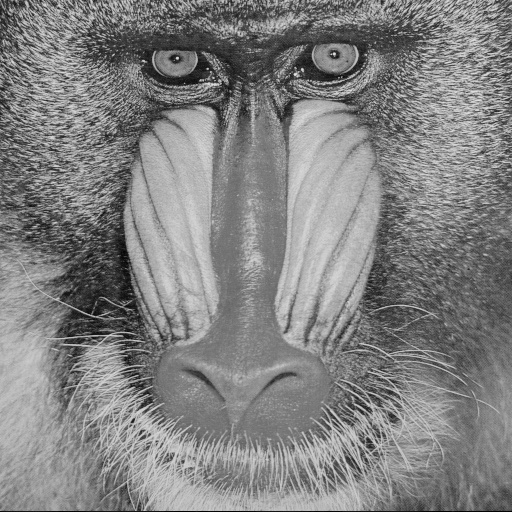

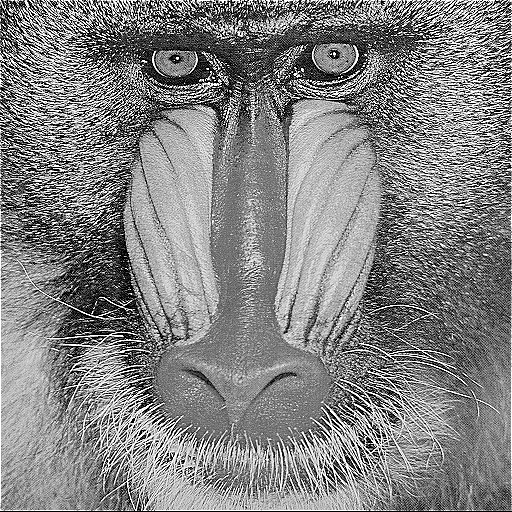

In [13]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Apply convolution
result = convolution2d(img_gray, kernel, stride=1, padding=1)

# Display the original image and the result
cv2_imshow(img_gray)
cv2_imshow(result)

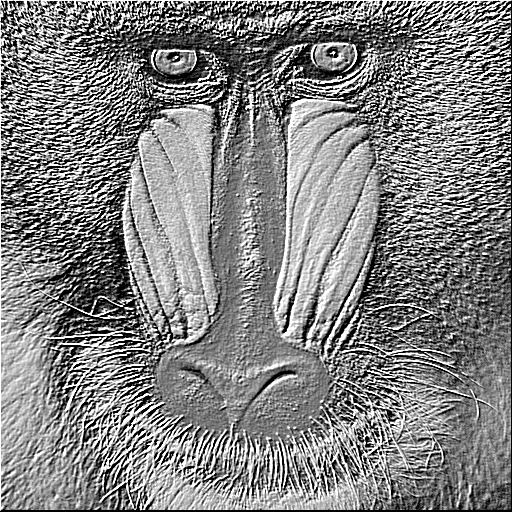

In [14]:
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

# Apply convolution
result = convolution2d(img_gray, kernel, stride=1, padding=1)

# Display the original image and the result
cv2_imshow(result)

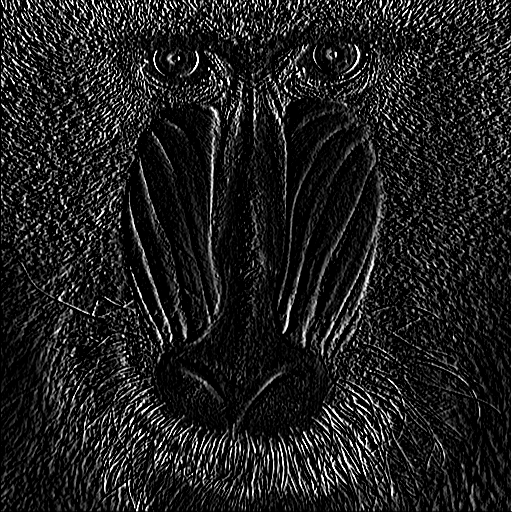

In [15]:
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Apply convolution
result = convolution2d(img_gray, kernel, stride=1, padding=1)

# Display the original image and the result
cv2_imshow(result)

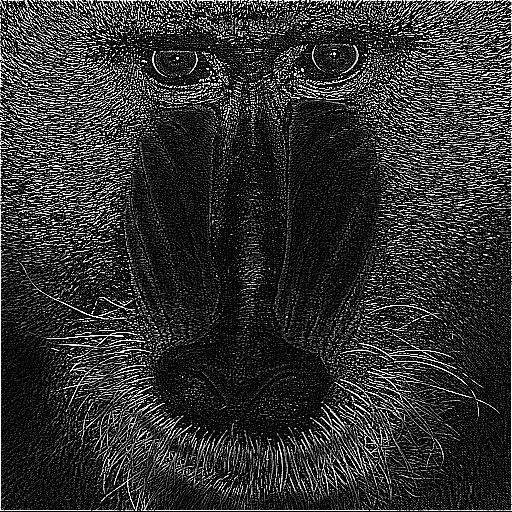

In [16]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Apply convolution
result = convolution2d(img_gray, kernel, stride=1, padding=1)

# Display the original image and the result
cv2_imshow(result)

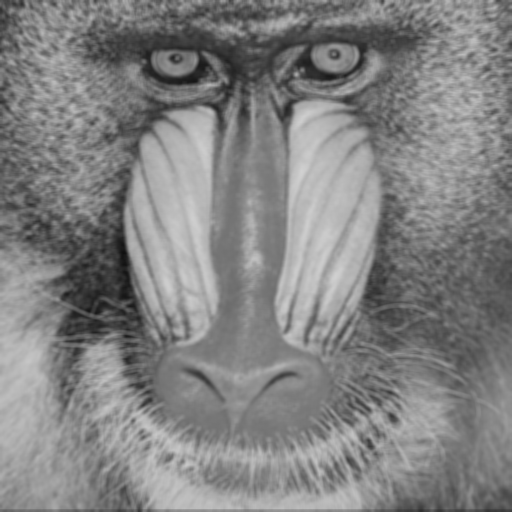

In [24]:
kernel_size = 5
sigma=math.sqrt(kernel_size)
gaussian_kernel =cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @gaussian_kernel.transpose()

# Apply convolution
result = cv.filter2D(img_gray, -1, gauss_kernel)

# Display the original image and the result
cv2_imshow(result)